# Demo: Table Comparison Engine

This notebook demonstrates how to use the table comparison engine from the core library of Artifact-ML to evaluate a synthetic tabular dataset.

The engine provides tools enabling the quantitative evaluation of distributional similarity between the synthetic and real datasets.

We'll walk through:

1. Loading real and synthetic datasets
2. Setting up the validation engine
3. Computing various comparison metrics
4. Generating visualizations to assess data similarity

## Setup

First, we'll set up our environment and import the necessary libraries.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
from artifact_core.table_comparison import (
    TableComparisonEngine,
    TableComparisonPlotType,
    TableComparisonScoreCollectionType,
    TableComparisonScoreType,
    TabularDataSpec,
)

## Loading the Data

We'll load both real and synthetic datasets from CSV files. These datasets appear to contain health-related information that we'll analyze and compare.

In [3]:
artifact_core_root = Path().absolute().parent

df_real = pd.read_csv(artifact_core_root / "assets/real.csv")
df_synthetic = pd.read_csv(artifact_core_root / "assets/synthetic.csv")

Let's examine the real dataset to understand its structure and content:

In [4]:
df_real

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


## Resource Specification Setup

Before we can compare the datasets, we need to specify which features are continuous and which are categorical.

This information helps the dataset comparison engine apply appropriate comparison metrics for each feature type.

In [5]:
ls_cts_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

resource_spec = TabularDataSpec.from_df(
    df=df_real,
    ls_cts_features=ls_cts_features,
    ls_cat_features=[feature for feature in df_real.columns if feature not in ls_cts_features],
)

## Initializing the Validation Engine

Now we'll initialize the TableComparisonEngine with our resource specification. This engine will handle all comparison operations between our real and synthetic datasets.

In [6]:
engine = TableComparisonEngine(resource_spec=resource_spec)

## Computing Statistical Distance Metrics

### Jensen-Shannon Distance

The Jensen-Shannon (JS) distance is a measure of similarity between probability distributions. It's based on the Kullback-Leibler divergence but is symmetric and always has a finite value.

Values closer to 0 indicate more similar distributions, while values closer to 1 indicate more dissimilar distributions.

In [7]:
engine.produce_dataset_comparison_score_collection(
    score_collection_type=TableComparisonScoreCollectionType.JS_DISTANCE,
    dataset_real=df_real,
    dataset_synthetic=df_synthetic,
)

{'Sex': 0.027609904421147052,
 'ChestPainType': 0.04196292783327019,
 'FastingBS': 0.028450062505962683,
 'RestingECG': 0.01496240981191071,
 'ExerciseAngina': 0.0015689800289268006,
 'ST_Slope': 0.02990681035010991,
 'HeartDisease': 0.005418597769725816,
 'Age': 0.08741338086398726,
 'RestingBP': 0.10629665945207548,
 'Cholesterol': 0.0546107231714023,
 'MaxHR': 0.1755840123934977,
 'Oldpeak': 0.13554524154039194}

### Mean Jensen-Shannon Distance

This computes the mean JS distance across all features, providing a single summary metric for how well the synthetic data matches the real data overall.

In [8]:
engine.produce_dataset_comparison_score(
    score_type=TableComparisonScoreType.MEAN_JS_DISTANCE,
    dataset_real=df_real,
    dataset_synthetic=df_synthetic,
)

0.059110809178533986

## Visualizing Dataset Comparisons

### Descriptive Statistics Comparison

This plot compares basic descriptive statistics (mean, median, standard deviation, etc.) between the real and synthetic datasets for each feature. It helps identify if the synthetic data captures the central tendencies and variability of the real data.

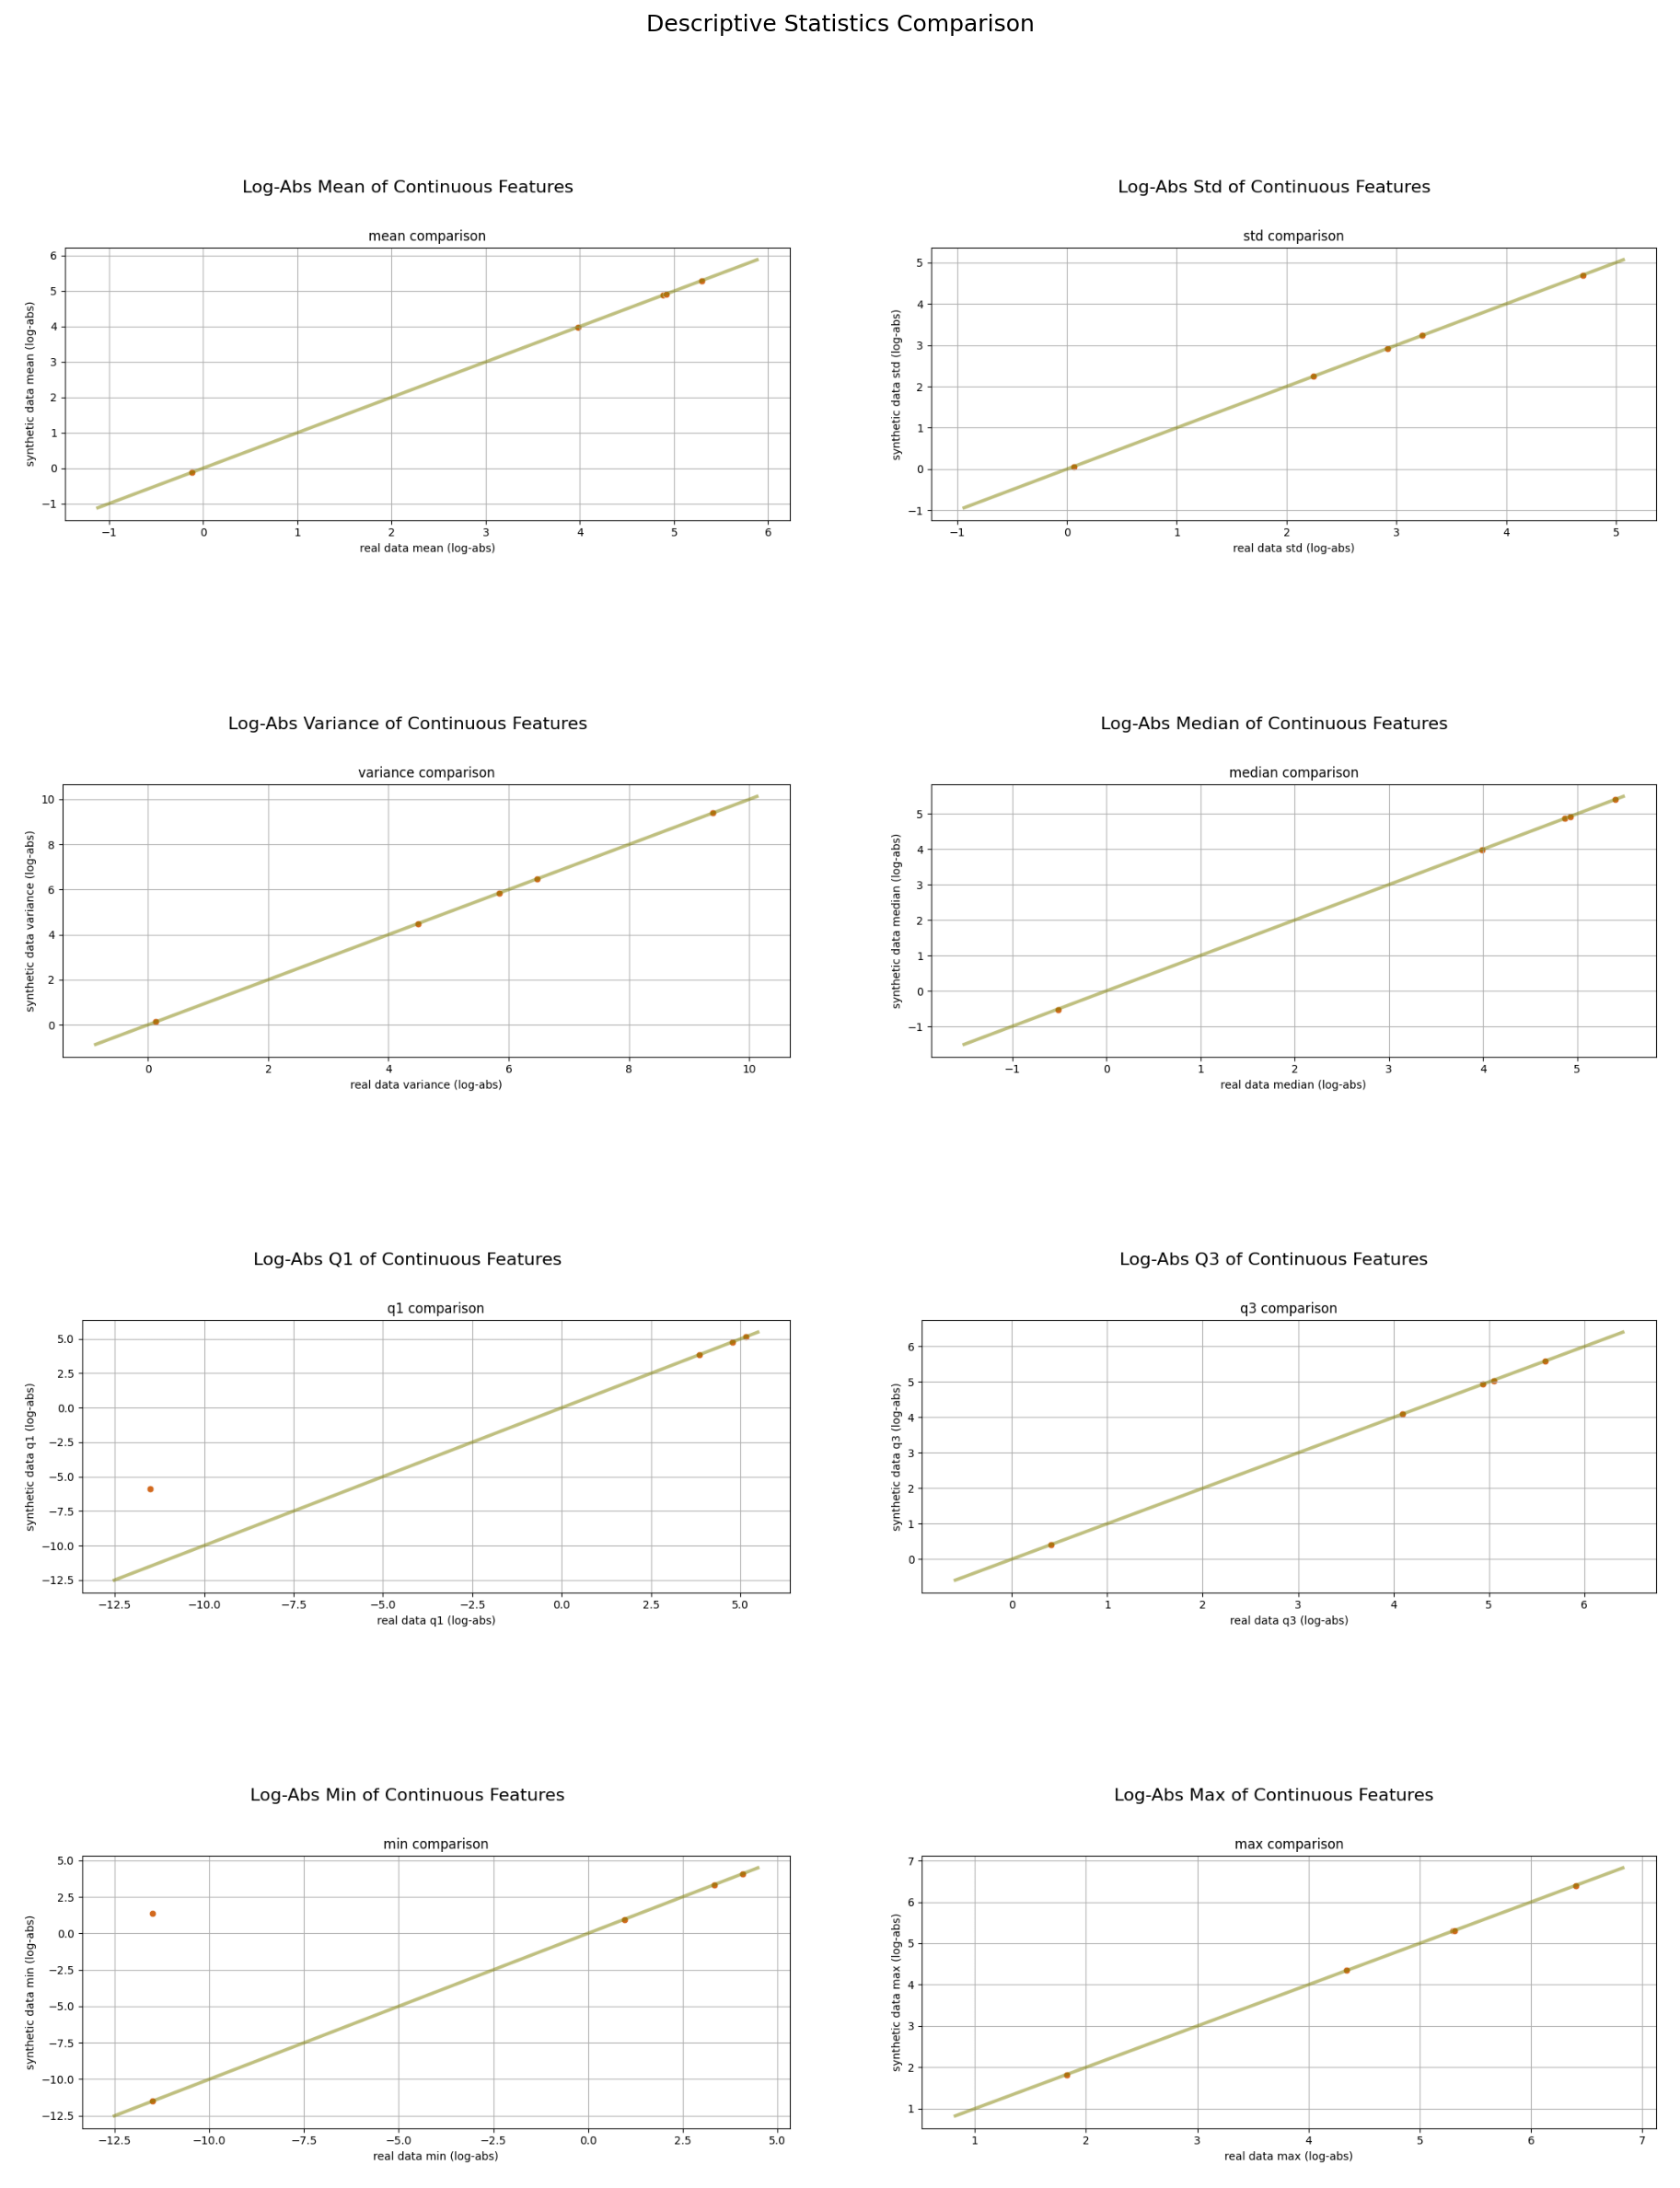

In [9]:
engine.produce_dataset_comparison_plot(
    plot_type=TableComparisonPlotType.DESCRIPTIVE_STATS_COMPARISON_PLOT,
    dataset_real=df_real,
    dataset_synthetic=df_synthetic,
)

### Probability Density Function (PDF) Comparison

The PDF plots show the distribution shapes for each feature in both datasets. This helps visualize how well the synthetic data captures the distribution characteristics of the real data, including skewness, modality, and outliers.

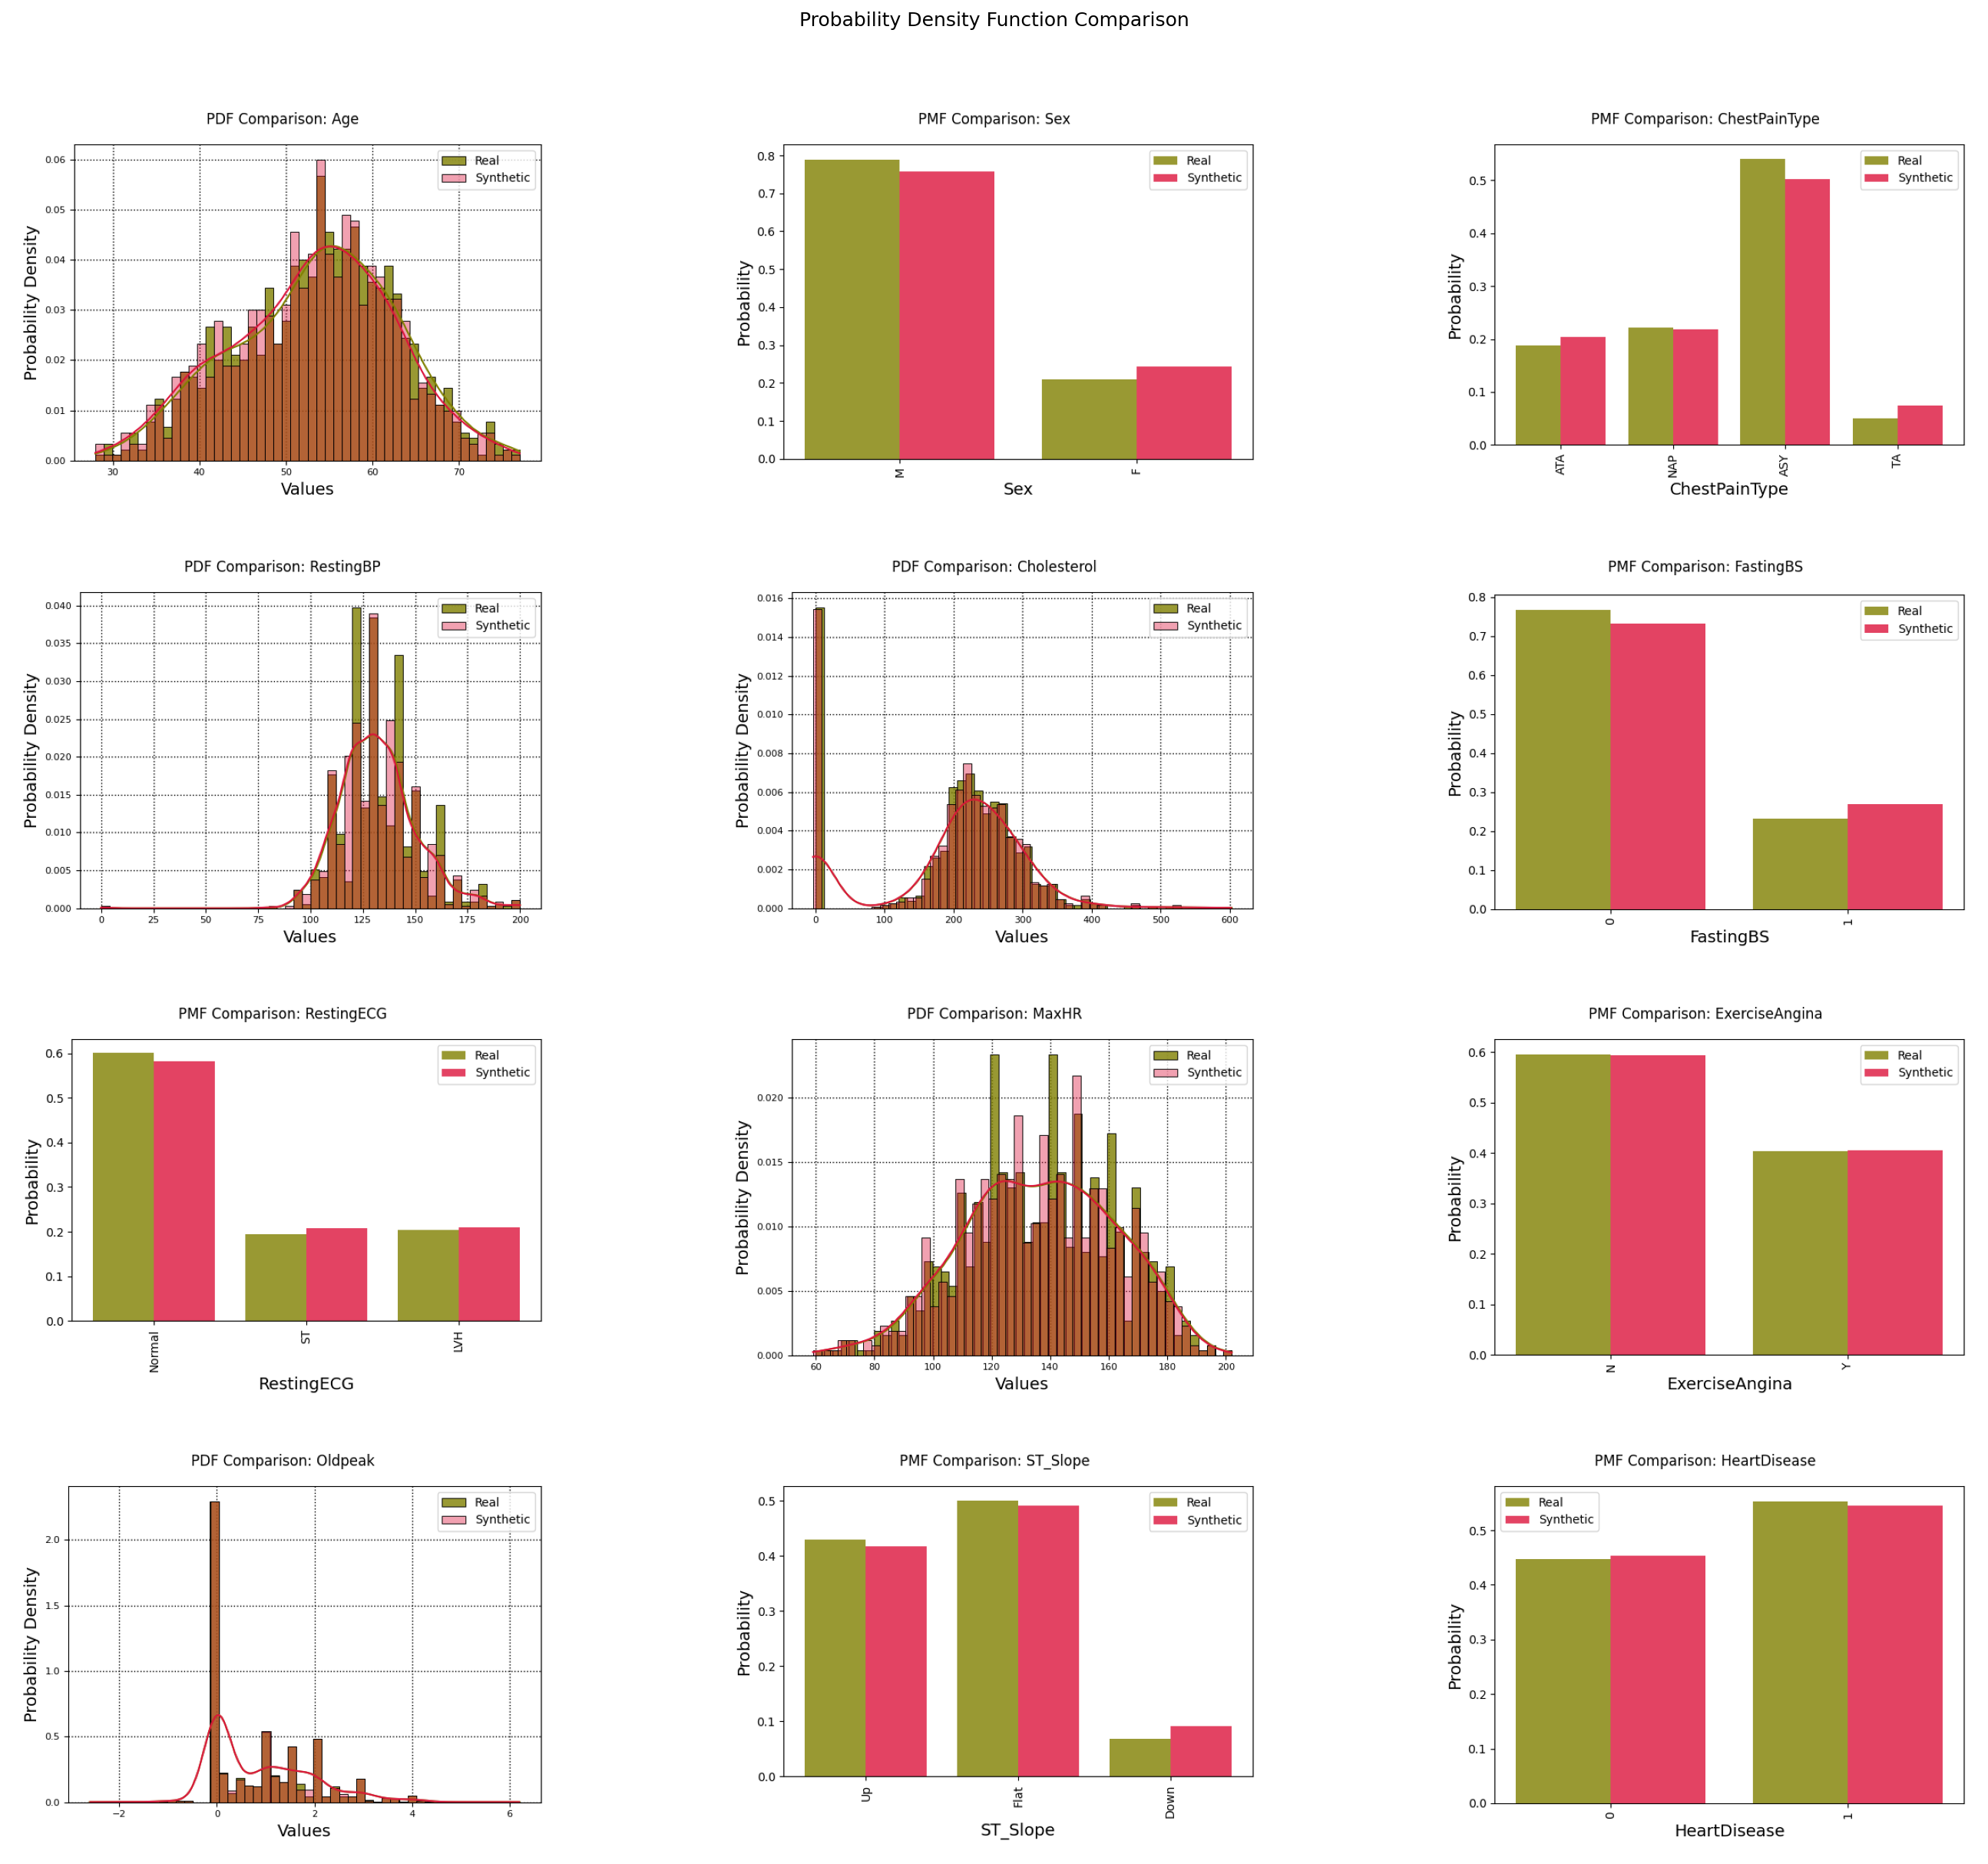

In [10]:
engine.produce_dataset_comparison_plot(
    plot_type=TableComparisonPlotType.PDF_PLOT, dataset_real=df_real, dataset_synthetic=df_synthetic
)

### Cumulative Distribution Function (CDF) Comparison

CDF plots show the cumulative probability distributions for each feature. These are particularly useful for identifying differences in percentiles and the overall range of values between the real and synthetic datasets.

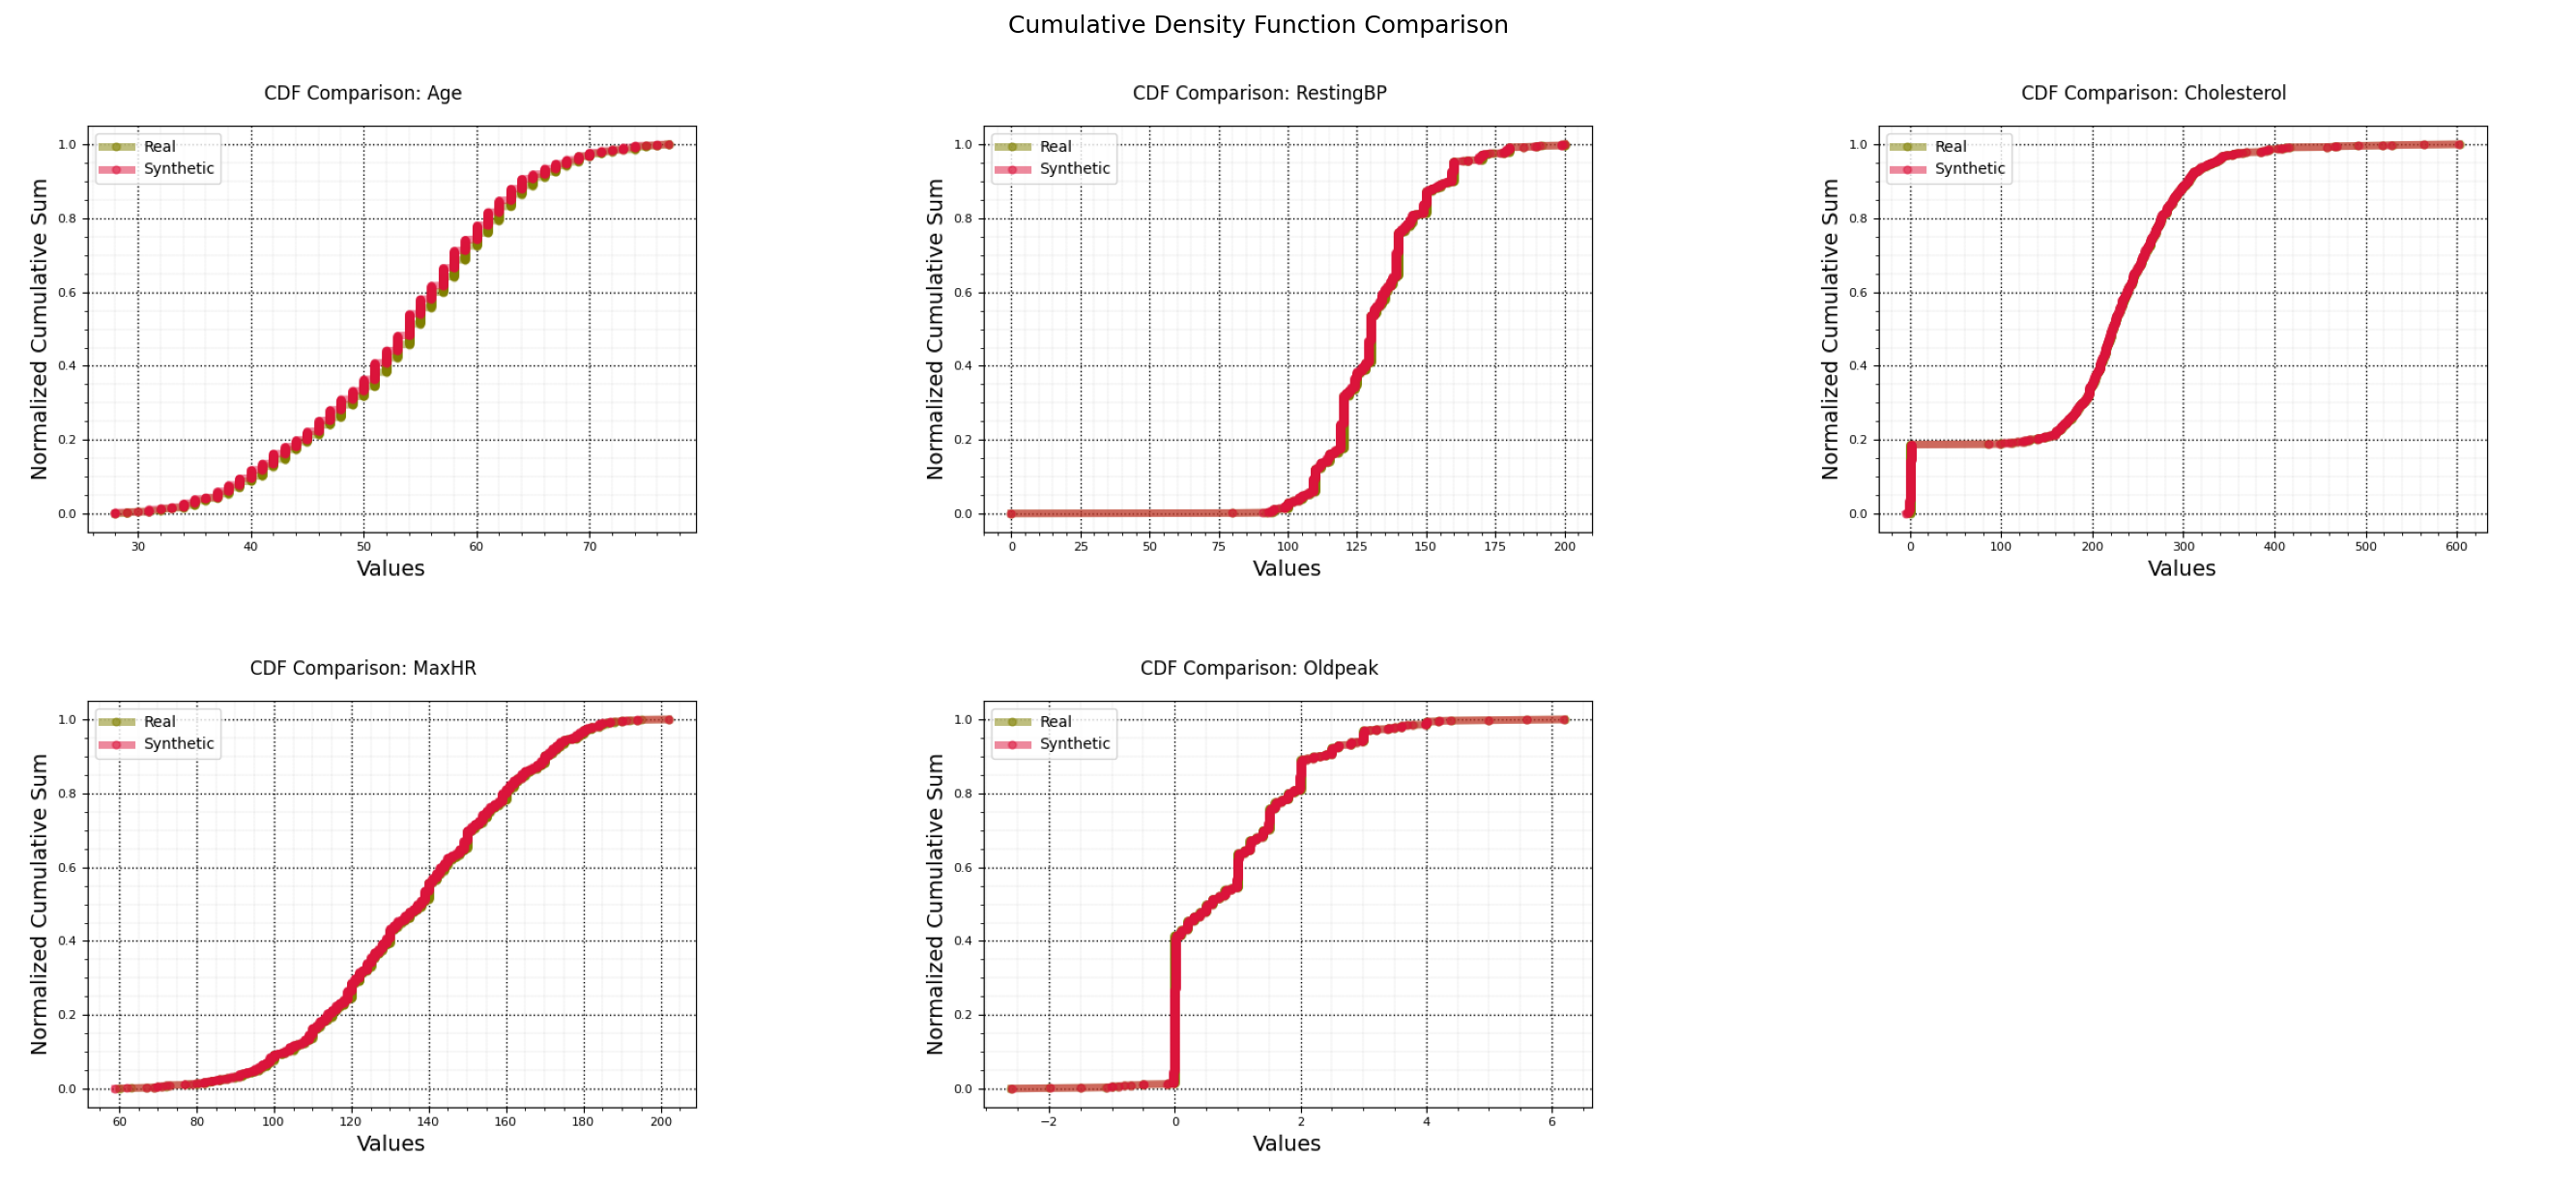

In [11]:
engine.produce_dataset_comparison_plot(
    plot_type=TableComparisonPlotType.CDF_PLOT, dataset_real=df_real, dataset_synthetic=df_synthetic
)

### Principal Component Analysis (PCA) Projection

PCA reduces the dimensionality of the data while preserving as much variance as possible. This plot projects both datasets into a lower-dimensional space (typically 2D), allowing us to visualize how well the synthetic data captures the overall structure and relationships in the real data.

If the synthetic data points overlap significantly with the real data points in this projection, it suggests that the synthetic data is capturing the joint distribution of features well.

c:\Users\hecto\Codebase\artifact-ml\artifact-core\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(
c:\Users\hecto\Codebase\artifact-ml\artifact-core\.venv\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


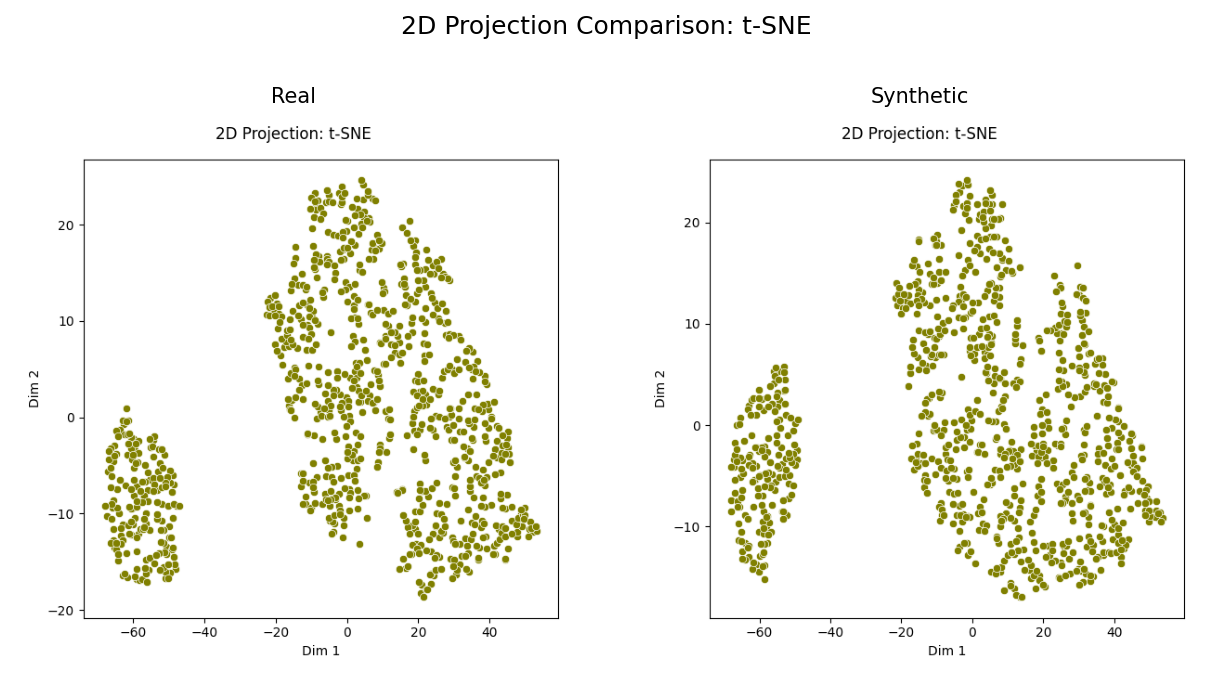

In [13]:
engine.produce_dataset_comparison_plot(
    plot_type=TableComparisonPlotType.TSNE_PROJECTION_PLOT,
    dataset_real=df_real,
    dataset_synthetic=df_synthetic,
)